# Understanding Animals through Data Exploration and Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
ants_df = pd.read_csv('culapsedants.csv')
ants_df.head(10)

,Site,Site name,Precipitation,Plant biomass,Year,Ant species,Colony,Sampling season,Log foraging distance,Ground temperature,Log worker body mass,Plant species number at patch,Total patch mass,Total patch density,Log total patch mass,Log total patch density,Log BS (mass),Log BS (number)
0,Medit B,Amatzia,380,195,2007,messor semirufus,1,Early Summer,0.477121,25.0,-2.117132,7,5.6948,1218,0.755478,3.085647,-1.164129,-2.569653
1,Medit B,Amatzia,380,195,2007,messor semirufus,3,Early Summer,0.903090,32.0,-2.371799,12,6.0379,347,0.780886,2.540329,-2.723455,-2.456085
2,Medit B,Amatzia,380,195,2007,messor semirufus,5,Late Summer,0.176091,26.5,-2.081519,16,9.2723,414,0.967187,2.617000,-2.867401,-2.645872
3,Medit B,Amatzia,380,195,2007,messor semirufus,6,Late Summer,0.477121,29.5,-1.956157,11,4.9414,229,0.693850,2.359835,-2.059354,-2.249310
4,Medit B,Amatzia,380,195,2007,messor semirufus,7,Late Summer,0.397940,29.8,-2.188171,7,9.4070,743,0.973451,2.870989,-2.480856,-2.897657
5,Medit B,Amatzia,380,195,2007,messor semirufus,8,Late Summer,0.602060,29.6,-1.925666,10,5.6567,607,0.752563,2.783189,-2.074632,-2.490816
6,Medit B,Amatzia,380,195,2007,messor semirufus,1,Late Summer,0.778151,24.7,-1.895255,14,6.4640,724,0.810501,2.859739,-2.034499,-2.834553
7,Medit B,Amatzia,380,195,2007,messor semirufus,6,Late Summer,0.755875,31.4,-1.915345,13,7.4876,620,0.874343,2.792392,-2.593154,-2.895712
8,Medit B,Amatzia,380,195,2007,messor semirufus,9,Late Summer,0.698970,22.5,-2.099641,9,6.8420,709,0.835183,2.850646,-2.911248,-2.723455
9,Medit B,Amatzia,380,195,2007,messor semirufus,10,Late Summer,0.602060,25.6,-1.954075,17,4.4845,379,0.651714,2.578639,-1.890518,-2.367013


In [3]:
ants_df.drop(['Log foraging distance'], axis=1, inplace=True)

In [4]:
ants_df.drop(['Log worker body mass'], axis=1, inplace=True)

In [5]:
ants_df.drop(['Log total patch mass'], axis=1, inplace=True)

In [6]:
ants_df.drop(['Log total patch density'], axis=1, inplace=True)

In [7]:
ants_df.drop(['Log BS (mass)'], axis=1, inplace=True)

In [8]:
ants_df.drop(['Log BS (number)'], axis=1, inplace=True)

In [9]:
ants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Site                           124 non-null    object 
 1   Site name                      124 non-null    object 
 2   Precipitation                  124 non-null    int64  
 3   Plant biomass                  124 non-null    int64  
 4   Year                           124 non-null    int64  
 5   Ant species                    124 non-null    object 
 6   Colony                         124 non-null    int64  
 7   Sampling season                124 non-null    object 
 8   Ground temperature             124 non-null    float64
 9   Plant species number at patch  124 non-null    int64  
 10  Total patch mass               124 non-null    float64
 11  Total patch density            124 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1

In [10]:
ants_df.describe()

,Precipitation,Plant biomass,Year,Colony,Ground temperature,Plant species number at patch,Total patch mass,Total patch density
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,365.967742,220.750000,2007.500000,7.201613,26.625000,8.451613,6.212683,508.354839
std,165.617442,100.503094,0.502028,5.524491,3.711937,3.520797,3.226805,324.336050
min,100.000000,65.000000,2007.000000,1.000000,17.600000,2.000000,1.409700,86.000000
25%,230.000000,149.000000,2007.000000,2.000000,24.350000,6.000000,4.171660,256.500000
50%,380.000000,195.000000,2007.500000,6.000000,26.500000,9.000000,5.576965,430.500000
75%,600.000000,370.000000,2008.000000,11.000000,28.725000,11.000000,7.437817,716.500000
max,600.000000,370.000000,2008.000000,20.000000,39.000000,17.000000,21.301540,1850.000000


In [11]:
ants_df['Site'].unique()

array(['Medit B', 'Semi-arid', 'Medit A', 'Mesic-Medit', 'Arid'],
      dtype=object)

In [12]:
pd.get_dummies(ants_df['Site'])

,Arid,Medit A,Medit B,Mesic-Medit,Semi-arid
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False
...,...,...,...,...,...
119,True,False,False,False,False
120,True,False,False,False,False
121,True,False,False,False,False
122,True,False,False,False,False


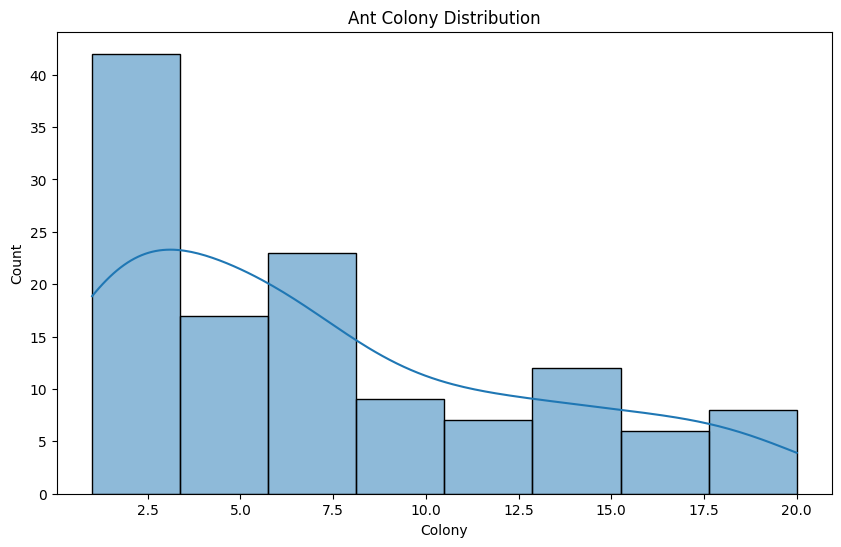

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(ants_df['Colony'].dropna(), kde=True)
plt.title('Ant Colony Distribution')
plt.show()

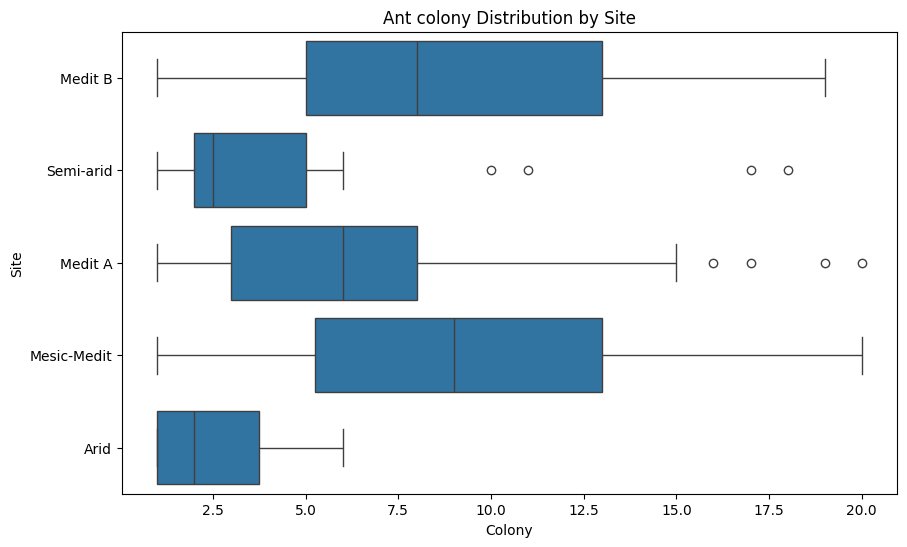

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Colony', y='Site', data=ants_df)
plt.title('Ant colony Distribution by Site')
plt.show()

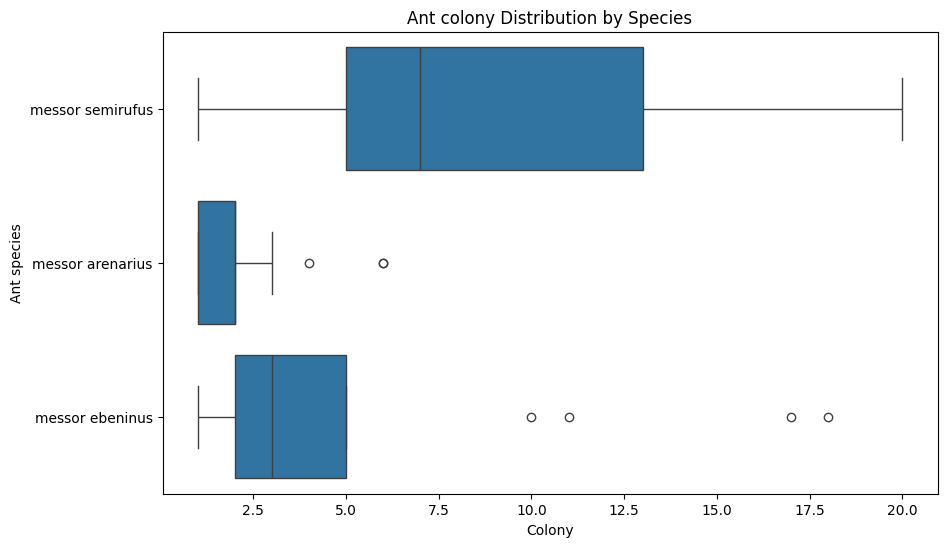

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Colony', y='Ant species', data=ants_df)
plt.title('Ant colony Distribution by Species')
plt.show()

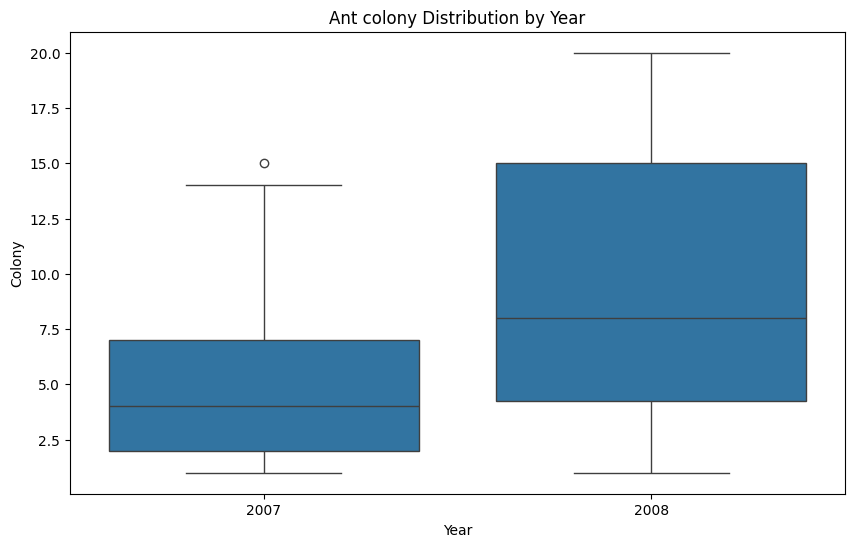

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Colony', data=ants_df)
plt.title('Ant colony Distribution by Year')
plt.show()

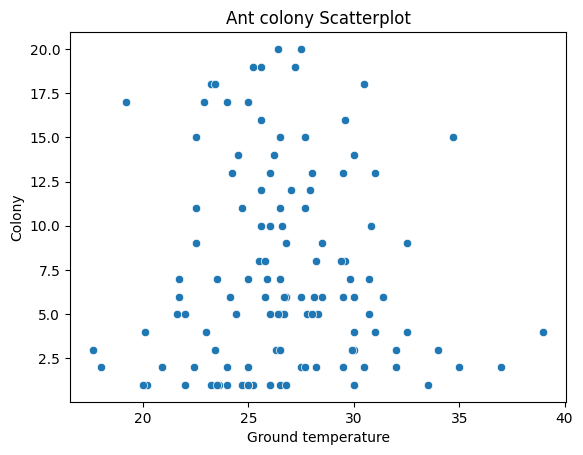

In [17]:
sns.scatterplot(x='Ground temperature', y='Colony', data=ants_df)
plt.title('Ant colony Scatterplot')
plt.show()

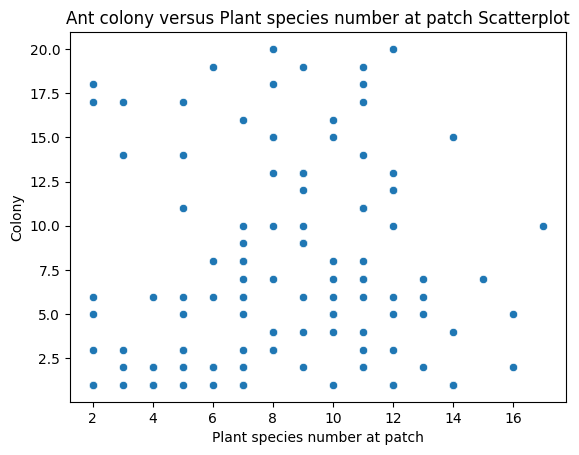

In [18]:
sns.scatterplot(x='Plant species number at patch', y='Colony', data=ants_df)
plt.title('Ant colony versus Plant species number at patch Scatterplot')
plt.show()


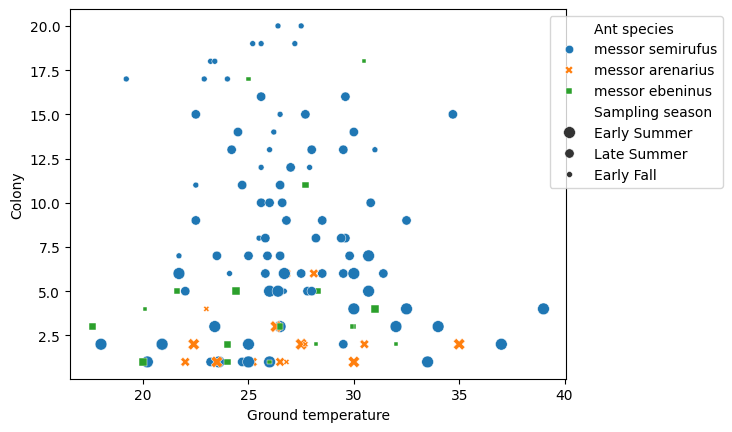

In [19]:
sns.scatterplot(data=ants_df, x='Ground temperature', y='Colony', hue='Ant species', style='Ant species', size='Sampling season')
plt.legend(bbox_to_anchor=(1.33, 1))

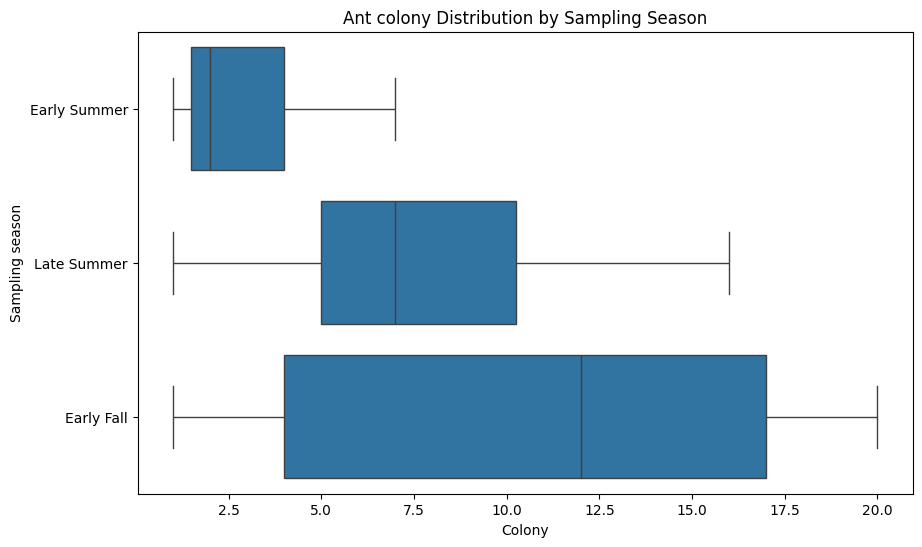

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Colony', y='Sampling season', data=ants_df)
plt.title('Ant colony Distribution by Sampling Season')
plt.show()

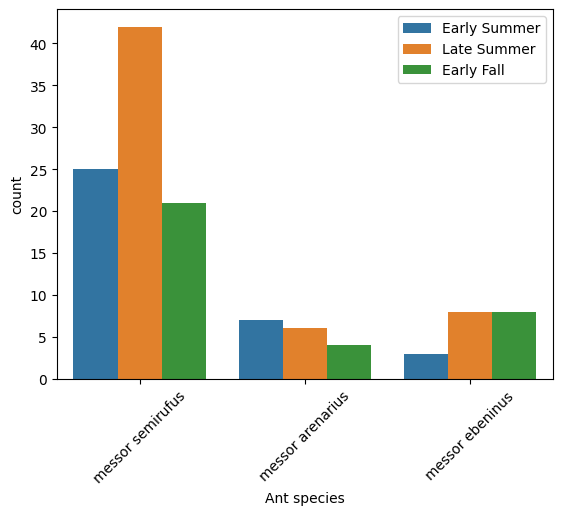

In [21]:
sns.countplot(data=ants_df, x='Ant species', hue='Sampling season')
plt.xticks(rotation=45)
plt.legend(loc='best')

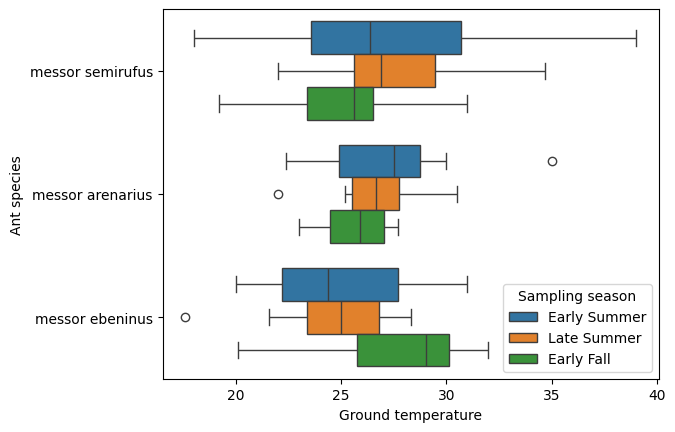

In [22]:
box = sns.boxplot(x='Ground temperature', y='Ant species', orient='h', hue='Sampling season', data=ants_df)

In [23]:
from scipy import stats

In [24]:
AntSample1 = ants_df['Colony'].dropna().sample(50, random_state=42)
AntSample2 = ants_df['Colony'].dropna().sample(50, random_state=24)

In [25]:
pd.get_dummies(ants_df['Ant species'])

,messor arenarius,messor ebeninus,messor semirufus
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
119,True,False,False
120,False,True,False
121,True,False,False
122,False,True,False


In [26]:
print(ants_df['Ant species'].describe())

count                  124
unique                   3
top       messor semirufus
freq                    88
Name: Ant species, dtype: object


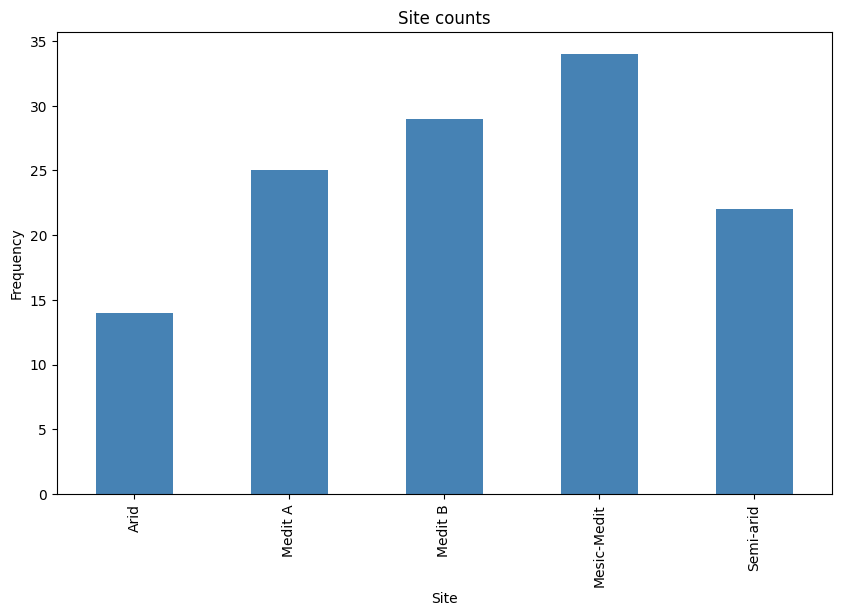

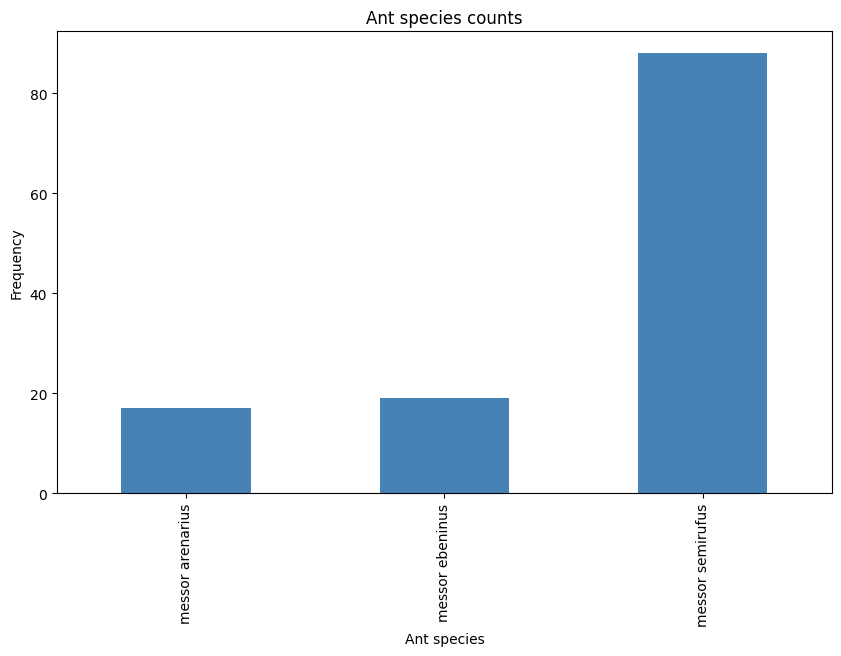

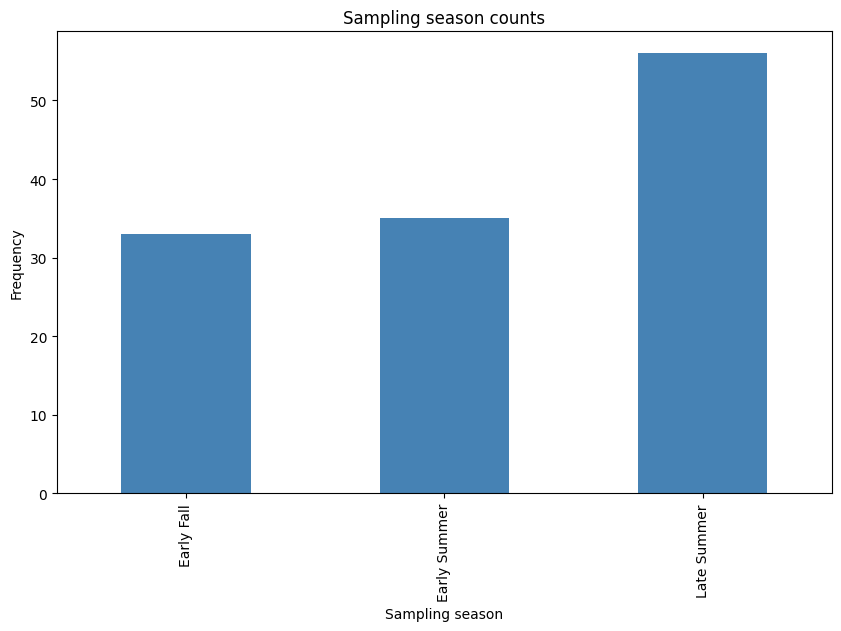

In [27]:
categorical_features = ['Site', 'Ant species', 'Sampling season']
for col in categorical_features:
    counts = ants_df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.show()

### Lasso Regression of Ant Data in terms of Colony vs Ground Temperature

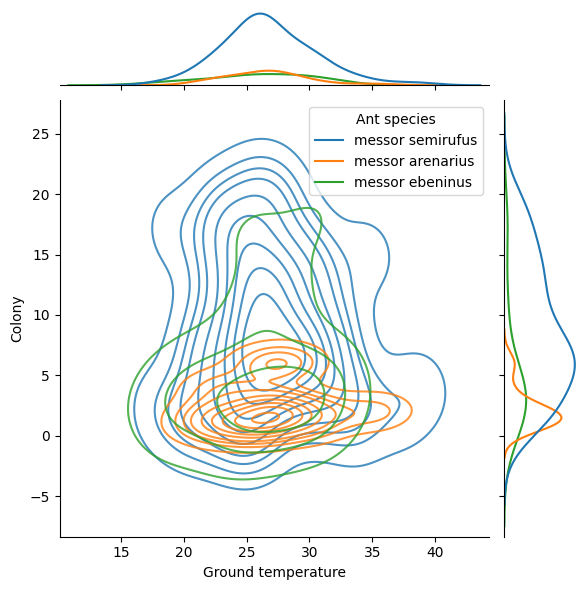

In [28]:
sns.jointplot(data=ants_df, x='Ground temperature', y='Colony', kind='kde', hue='Ant species', alpha=0.80)

> In the above Lasso Regression, how many rings are present?  What can we learn about the intersections of all the rings in terms of ant colony and ground temperature as a constant?  How does the ground temperature affect speciation of the number of ant colonies?

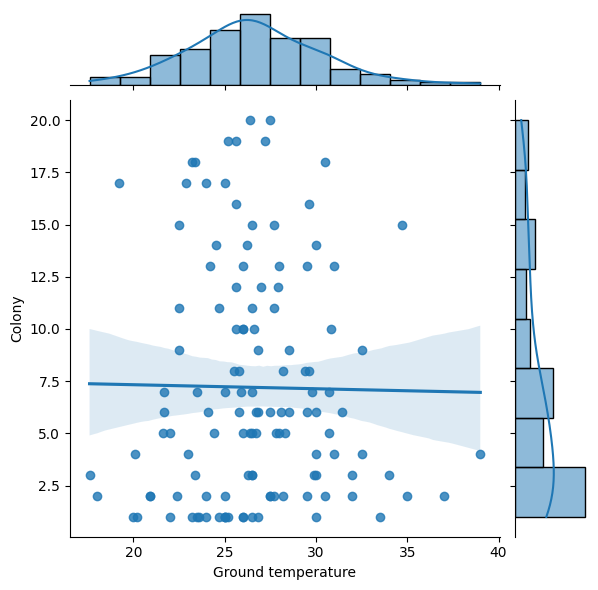

In [29]:
sns.jointplot(data=ants_df, x='Ground temperature', y='Colony', kind='reg')

> Since ground temperature is a constant and it varies with time, can we locate critical values for the size of the ant colony?  For example, f(Ground temperature) = Colony.

In [30]:
import plotly.express as px
fig = px.scatter(ants_df, x='Ground temperature', y='Colony', color='Site', size='Plant species number at patch', text='Site')
fig.update_layout(showlegend=False)
fig.show()

> As, Ground temperature is a constant, what can you infer about the size of the Colony at different sites and eating on some number of plant species?

## Using Hamster Data for Classification and Prediction

In [31]:
!pip install matplotplib

ERROR: Could not find a version that satisfies the requirement matplotplib (from versions: none)
ERROR: No matching distribution found for matplotplib

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import datetime as dt

In [33]:
hamster_df = pd.read_csv('RawGoldenHamster.csv')
hamster_df.head(10)

,hamsterName,date,mph,rpm,runTimeSeconds,totalInches,totalRevolutions,activityCount
0,cutie,12/8/19,1.06,58,1451,30849,1582,209
1,fluff,12/8/19,1.68,85,5202,190365,9065,369
2,sprinkles,12/8/19,1.05,74,4147,66765,4451,381
3,cutie,12/9/19,1.48,80,519,15873,814,60
4,fluff,12/9/19,1.63,82,13557,538503,25643,785
5,sprinkles,12/9/19,0.96,68,1836,32910,2194,141
6,cutie,12/10/19,1.45,78,179,5518,283,24
7,fluff,12/10/19,1.75,88,3546,130893,6233,364
8,sprinkles,12/10/19,1.08,76,2544,47970,3198,183
9,cutie,12/11/19,1.81,98,2840,104890,5379,323


In [34]:
hamster_df = pd.read_csv('RawGoldenHamster.csv', usecols=['date', 'mph'])

hamster_df.head(10)

,date,mph
0,12/8/19,1.06
1,12/8/19,1.68
2,12/8/19,1.05
3,12/9/19,1.48
4,12/9/19,1.63
5,12/9/19,0.96
6,12/10/19,1.45
7,12/10/19,1.75
8,12/10/19,1.08
9,12/11/19,1.81


In [35]:
hamster_df

,date,mph
0,12/8/19,1.06
1,12/8/19,1.68
2,12/8/19,1.05
3,12/9/19,1.48
4,12/9/19,1.63
...,...,...
1211,3/8/21,1.26
1212,3/8/21,1.54
1213,3/9/21,1.22
1214,3/9/21,1.31


In [36]:
hamster_df = hamster_df.set_index(pd.DatetimeIndex(hamster_df['date'])).drop('date', axis=1)
hamster_df.head()

,mph
date,
2019-12-08,1.06
2019-12-08,1.68
2019-12-08,1.05
2019-12-09,1.48
2019-12-09,1.63


<AxesSubplot: xlabel='date'>

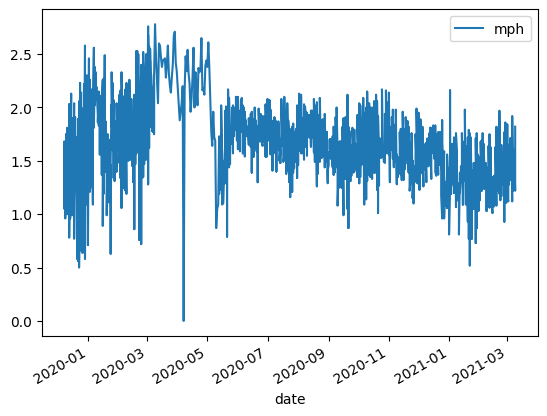

In [37]:
hamster_df.plot()

In [38]:
print(hamster_df.max(), hamster_df.idxmax())

mph    2.78
dtype: float64 mph   2020-03-09
dtype: datetime64[ns]


<AxesSubplot: xlabel='date'>

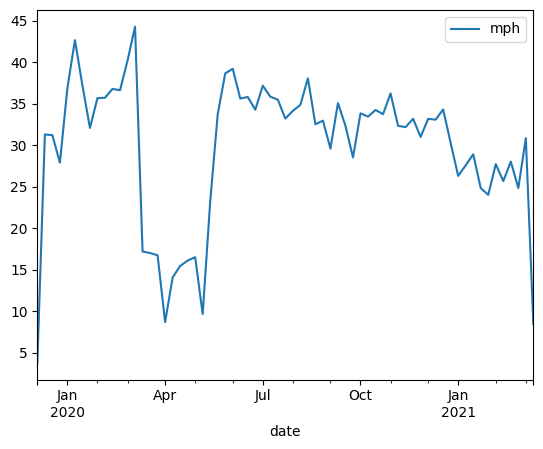

In [39]:
hamster_df.resample('W').sum().plot()

<AxesSubplot: xlabel='date'>

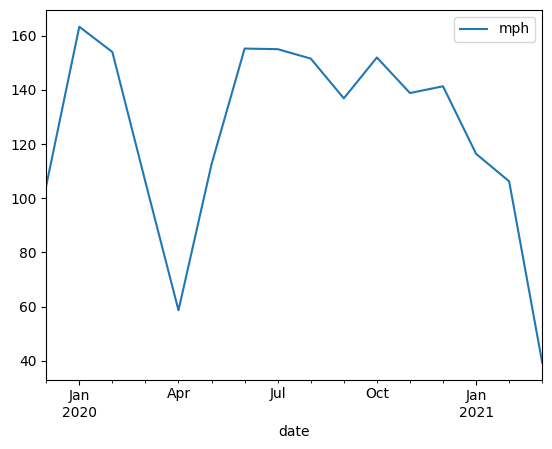

In [40]:
hamster_df.resample('m').sum().plot()

## Investigating Penguins through Data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [42]:
df_2 = (lambda: _deepnote_execute_sql('SELECT *\nFROM \'penguins.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT *\nFROM \'penguins.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_2

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [43]:
penguin_df = pd.read_csv('penguins.csv')
penguin_df.head(10)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
6,38.9,17.8,181.0,3625.0,0
7,39.2,19.6,195.0,4675.0,0
8,34.1,18.1,193.0,3475.0,0
9,42.0,20.2,190.0,4250.0,0


In [44]:
penguin_df

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [45]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [46]:
penguin_df.rename(columns={'CulmenLength':  'penguin_culmen_length'}, inplace=True)
penguin_df.head()

,penguin_culmen_length,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


## Classifying and Interpreting Snail Data

In [47]:
df_3 = (lambda: _deepnote_execute_sql('SELECT *\nFROM \'abaloneSeaSnails.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT *\nFROM \'abaloneSeaSnails.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_3

,sex,length,diameter,height,whole-weight,rings,shucked-weight,viscera-weight,shell-weight
0,M,91,73,19,102.8,15,44.9,20.2,30.0
1,M,70,53,18,45.1,7,19.9,9.7,14.0
2,F,106,84,27,135.4,9,51.3,28.3,42.0
3,M,88,73,25,103.2,10,43.1,22.8,31.0
4,I,66,51,16,41.0,7,17.9,7.9,11.0
...,...,...,...,...,...,...,...,...,...
4172,F,113,90,33,177.4,11,74.0,47.8,49.8
4173,M,118,88,27,193.2,10,87.8,42.9,52.1
4174,M,120,95,41,235.2,9,105.1,57.5,61.6
4175,F,125,97,30,218.9,10,106.2,52.2,59.2


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
snail_df = pd.read_csv('abaloneSeaSnails.csv')
snail_df.head(10)

,sex,length,diameter,height,whole-weight,rings,shucked-weight,viscera-weight,shell-weight
0,M,91,73,19,102.8,15,44.9,20.2,30.0
1,M,70,53,18,45.1,7,19.9,9.7,14.0
2,F,106,84,27,135.4,9,51.3,28.3,42.0
3,M,88,73,25,103.2,10,43.1,22.8,31.0
4,I,66,51,16,41.0,7,17.9,7.9,11.0
5,I,85,60,19,70.3,8,28.2,15.5,24.0
6,F,106,83,30,155.5,20,47.4,28.3,66.0
7,F,109,85,25,153.6,16,58.8,29.9,52.0
8,M,95,74,25,101.9,9,43.3,22.5,33.0
9,F,110,88,30,178.9,19,62.9,30.2,64.0


In [50]:
snail_df

,sex,length,diameter,height,whole-weight,rings,shucked-weight,viscera-weight,shell-weight
0,M,91,73,19,102.8,15,44.9,20.2,30.0
1,M,70,53,18,45.1,7,19.9,9.7,14.0
2,F,106,84,27,135.4,9,51.3,28.3,42.0
3,M,88,73,25,103.2,10,43.1,22.8,31.0
4,I,66,51,16,41.0,7,17.9,7.9,11.0
...,...,...,...,...,...,...,...,...,...
4172,F,113,90,33,177.4,11,74.0,47.8,49.8
4173,M,118,88,27,193.2,10,87.8,42.9,52.1
4174,M,120,95,41,235.2,9,105.1,57.5,61.6
4175,F,125,97,30,218.9,10,106.2,52.2,59.2


In [51]:
snail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   int64  
 2   diameter        4177 non-null   int64  
 3   height          4177 non-null   int64  
 4   whole-weight    4177 non-null   float64
 5   rings           4177 non-null   int64  
 6   shucked-weight  4177 non-null   float64
 7   viscera-weight  4177 non-null   float64
 8   shell-weight    4177 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


In [52]:
snail_df.rename(columns={'sex':  'snail_gender'}, inplace=True)
snail_df.head()

,snail_gender,length,diameter,height,whole-weight,rings,shucked-weight,viscera-weight,shell-weight
0,M,91,73,19,102.8,15,44.9,20.2,30.0
1,M,70,53,18,45.1,7,19.9,9.7,14.0
2,F,106,84,27,135.4,9,51.3,28.3,42.0
3,M,88,73,25,103.2,10,43.1,22.8,31.0
4,I,66,51,16,41.0,7,17.9,7.9,11.0


In [53]:
mean = snail_df['length'].mean()
print('Mean:', mean)

Mean: 104.79841991860187


In [54]:
median =  snail_df['length'].median()
print('Median:', median)

Median: 109.0


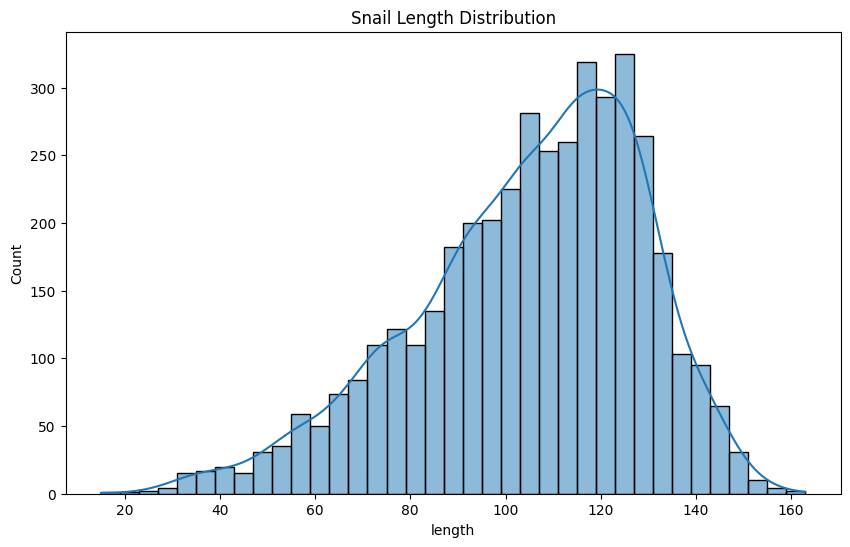

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(snail_df['length'].dropna(), kde=True)
plt.title('Snail Length Distribution')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a18d123-7c44-4135-8999-8fd18286c48e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>